# Nome do Aluno

**Alexandre Emilio Manhães Pardelinha** - alexandre.pardelinha@aluno.cefet-rj.br 


# Descrição da tarefa

Esta tarefa é dividida nas seguintes etapas:

1. Escolher algum artigo no qual uma técnica de sampling ou embedding (para redes complexas, claro) utilizada em algum experimento. Preferencialmente, uma técnica que não seja exatamente uma das foram apresentadas nas aulas.
2. Reproduza pelo menos 1 desses experimentos. Para isso você pode criar um notebook jupyter no google colab no qual a sua versão do experimento é feita, imitando os passos descritos no artigo que conduzam dos dados de entrada a resultados (por ex, um gráfico) obtidos a partir deles similares aos do artigo de referência. Obviamente, um desses passos deve ser a aplicação de uma técnica de sampling ou embedding.
3. Inclua no fim do seu notebook, numa célula de texto, uma breve descrição da técnica de sampling ou embedding usada: como ela funciona, que características interessantes ela possui etc.
4. Como resposta à tarefa, envie um PDF do notebook e também um link para acesso ao mesmo (somente leitura) no próprio google colab.

# Artigo escolhido para o trabalho
*Reducing Large Internet Topologies for Faster Simulations* (Krishnamurthy et al. - Networking 2005).

# Método Utilizado
*Random Edge Sampler*: removam-se bordas aleatoriamente, cada uma com a mesma probabilidade (DRE).

# Introdução
A amostragem do gráfico pode ser usada como uma ferramenta para fornecer uma visão sobre as propriedades topológicas e a estrutura do gráfico. Neste artigo, foram desenvolvidos métodos para "amostrar" um pequeno gráfico realista de uma grande rede real. Foram propostos uma série de métodos de redução que podem ser categorizados em três classes: (a) métodos de exclusão, (b) métodos de contração e (c) métodos de exploração (Krishnamurthy et al. 2005). 

# Propriedade do Gráfico 
O grau médio de um gráfico é igual a *2m / n*, onde *m* é o número de links e *n* é o número de nós. O grau médio representa a densidade de um gráfico. O grau médio de topologias da Internet é conhecido por aumentar com o tempo, à medida que o tamanho do gráfico também aumenta (Krishnamurthy et al. 2005). 

# Método de Exclusão 
O método de exclusão foi incorporado na seguinte estrutura: a entrada consiste de um grafo inicial *G* com *n* nós e *m* arestas. O gráfico é reduzido iterativamente em estágios, onde em cada estágio uma pequena porcentagem *s* de arestas é removida (onde *s* é um parâmetro que foi definido pelo usuário com valor igual a 5%) (Krishnamurthy et al. 2005).



# Análise do DRE 
O método DRE, conforme implementado nos experimentos, remove arestas aleatoriamente, uma de cada vez, e retém a maior parte do componente conectado. Esse processo, em sua forma bruta, não é passível de estudos analíticos, pois a distribuição de grau dos nós eliminados depende fortemente da topologia (desconhecida) propriedades de *G* (Krishnamurthy et al. 2005). 

# Avaliação da redução do gráfico
O gráfico *G* tem 10.966 nós e 22.536 arestas, portanto um grau médio de 4,11. A "curva da Internet" mostrada no gráfico representa o valor de instâncias reais da Internet de tamanho correspondente ao valor no eixo *x* (Krishnamurthy et al. 2005). 

# Resultados
Usando uma entrada inicial de 10.966 nós e 22.536 arestas, as arestas foram removidas aleatoriamente em 5% para cada estágio, até chegar a uma redução de 70%. Em cada estágio foi calculado o grau médio, para que seja feito, através da figura 1, a relação *Redução das Arestas (%) X Grau Médio*. Houve 15 estágios até chegar à redução de 70% das arestas.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### **Estágio 1 (inicial)**

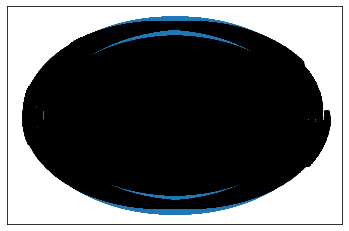

In [ ]:
G1 = nx.gnm_random_graph(10966, 22536)
nx.draw_networkx(G1, nx.layout.circular_layout(G1))

In [ ]:
G1.number_of_edges()

22536

In [ ]:
df_degree = pd.DataFrame(data=G1.degree())


In [ ]:
df_degree.describe()

,0,1
count,10966.00000,10966.000000
mean,5482.50000,4.110159
std,3165.75586,2.023954
min,0.00000,0.000000
25%,2741.25000,3.000000
50%,5482.50000,4.000000
75%,8223.75000,5.000000
max,10965.00000,15.000000


### **Estágio 2: reduzindo as arestas em 5%**

In [ ]:
22536*0.95

21409.2

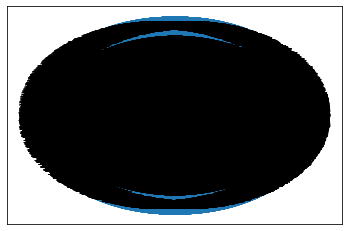

In [ ]:
indexes = np.random.choice(len(G1.edges()), 21409, replace=False)
edges = np.array(G1.edges())[indexes]
G2 = nx.from_edgelist(edges)
nx.draw_networkx(G2, nx.layout.circular_layout(G2))

In [ ]:
G2.number_of_edges()

21409

In [ ]:
df_degree = pd.DataFrame(data=G2.degree())

In [ ]:
df_degree.describe()

,0,1
count,10762.000000,10762.000000
mean,5479.944992,3.978629
std,3162.924369,1.915924
min,0.000000,1.000000
25%,2741.250000,3.000000
50%,5477.500000,4.000000
75%,8219.750000,5.000000
max,10965.000000,15.000000


### **Estágio 3: reduzindo as arestas em 10%**

In [ ]:
22536*0.9

20282.4

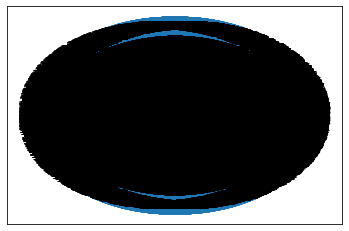

In [ ]:
indexes = np.random.choice(len(G1.edges()), 20282, replace=False)
edges = np.array(G1.edges())[indexes]
G3 = nx.from_edgelist(edges)
nx.draw_networkx(G3, nx.layout.circular_layout(G3))

In [ ]:
G3.number_of_edges()

20282

In [ ]:
df_degree = pd.DataFrame(data=G3.degree())

In [ ]:
df_degree.describe()

,0,1
count,10711.000000,10711.000000
mean,5478.942209,3.787135
std,3164.309537,1.853421
min,0.000000,1.000000
25%,2740.500000,2.000000
50%,5477.000000,4.000000
75%,8220.500000,5.000000
max,10965.000000,14.000000


### **Estágio 4: reduzindo as arestas em 15%**

In [ ]:
22536*0.85

19155.6

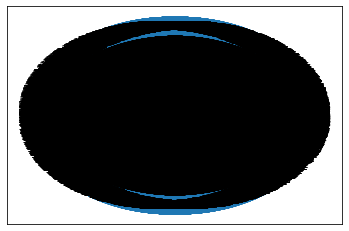

In [ ]:
indexes = np.random.choice(len(G1.edges()), 19155, replace=False)
edges = np.array(G1.edges())[indexes]
G4 = nx.from_edgelist(edges)
nx.draw_networkx(G4, nx.layout.circular_layout(G4))

In [ ]:
G4.number_of_edges()

19155

In [ ]:
df_degree = pd.DataFrame(data=G4.degree())

In [ ]:
df_degree.describe()

,0,1
count,10637.000000,10637.000000
mean,5479.596503,3.601579
std,3165.299407,1.796048
min,0.000000,1.000000
25%,2740.000000,2.000000
50%,5476.000000,3.000000
75%,8218.000000,5.000000
max,10965.000000,13.000000


### **Estágio 5: reduzindo as arestas em 20%**




In [ ]:
22536*0.80

18028.8

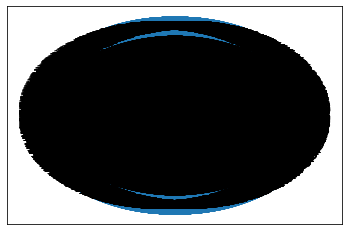

In [ ]:
indexes = np.random.choice(len(G1.edges()), 18028, replace=False)
edges = np.array(G1.edges())[indexes]
G5 = nx.from_edgelist(edges)
nx.draw_networkx(G5, nx.layout.circular_layout(G5))

In [ ]:
G5.number_of_edges()

18028

In [ ]:
df_degree = pd.DataFrame(data=G5.degree())

In [ ]:
df_degree.describe()

,0,1
count,10555.000000,10555.000000
mean,5480.651729,3.416011
std,3161.048517,1.723834
min,0.000000,1.000000
25%,2747.500000,2.000000
50%,5478.000000,3.000000
75%,8214.500000,4.000000
max,10965.000000,12.000000


### **Estágio 6: reduzindo as arestas em 25%**

In [ ]:
22536*0.75

16902.0

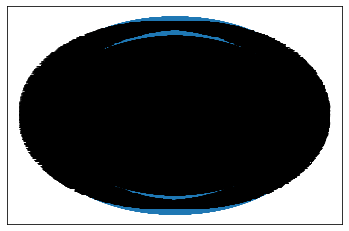

In [ ]:
indexes = np.random.choice(len(G1.edges()), 16902, replace=False)
edges = np.array(G1.edges())[indexes]
G6 = nx.from_edgelist(edges)
nx.draw_networkx(G6, nx.layout.circular_layout(G6))

In [ ]:
G6.number_of_edges()

16902

In [ ]:
df_degree = pd.DataFrame(data=G6.degree())

In [ ]:
df_degree.describe()

,0,1
count,10461.000000,10461.000000
mean,5471.029156,3.231431
std,3160.969933,1.664748
min,0.000000,1.000000
25%,2745.000000,2.000000
50%,5462.000000,3.000000
75%,8202.000000,4.000000
max,10965.000000,13.000000


### **Estágio 7: reduzindo as arestas em 30%**

In [ ]:
22536*0.70

15775.199999999999

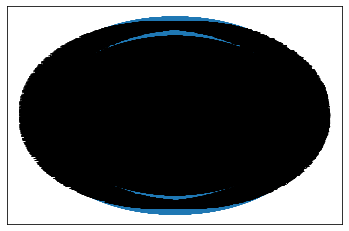

In [ ]:
indexes = np.random.choice(len(G1.edges()), 15775, replace=False)
edges = np.array(G1.edges())[indexes]
G7 = nx.from_edgelist(edges)
nx.draw_networkx(G7, nx.layout.circular_layout(G7))

In [ ]:
G7.number_of_edges()

15775

In [ ]:
df_degree = pd.DataFrame(data=G7.degree())

In [ ]:
df_degree.describe()

,0,1
count,10351.000000,10351.000000
mean,5484.618298,3.048015
std,3162.776346,1.584683
min,1.000000,1.000000
25%,2748.500000,2.000000
50%,5483.000000,3.000000
75%,8226.500000,4.000000
max,10965.000000,13.000000


### **Estágio 8: reduzindo as arestas em 35%**

In [ ]:
22536*0.65

14648.4

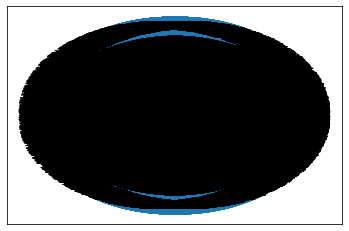

In [ ]:
indexes = np.random.choice(len(G1.edges()), 14648, replace=False)
edges = np.array(G1.edges())[indexes]
G8 = nx.from_edgelist(edges)
nx.draw_networkx(G8, nx.layout.circular_layout(G8))

In [ ]:
G8.number_of_edges()

14648

In [ ]:
df_degree = pd.DataFrame(data=G8.degree())

In [ ]:
df_degree.describe()

,0,1
count,10235.000000,10235.000000
mean,5481.975574,2.862335
std,3163.270909,1.506971
min,1.000000,1.000000
25%,2751.500000,2.000000
50%,5479.000000,3.000000
75%,8209.500000,4.000000
max,10965.000000,12.000000


### **Estágio 9: reduzindo as arestas em 40%**

In [ ]:
22536*0.60

13521.6

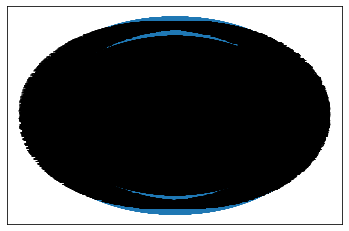

In [ ]:
indexes = np.random.choice(len(G1.edges()), 13521, replace=False)
edges = np.array(G1.edges())[indexes]
G9 = nx.from_edgelist(edges)
nx.draw_networkx(G9, nx.layout.circular_layout(G9))

In [ ]:
G9.number_of_edges()

13521

In [ ]:
df_degree = pd.DataFrame(data=G9.degree())

In [ ]:
df_degree.describe()

,0,1
count,10080.000000,10080.000000
mean,5487.109821,2.682738
std,3163.602584,1.434463
min,0.000000,1.000000
25%,2759.750000,2.000000
50%,5487.500000,2.000000
75%,8227.250000,4.000000
max,10965.000000,12.000000


### **Estágio 10: reduzindo as arestas em 45%**

In [ ]:
22536*0.55

12394.800000000001

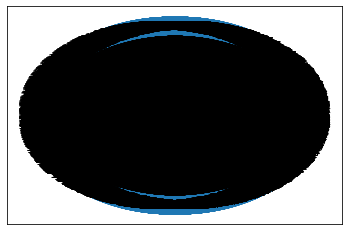

In [ ]:
indexes = np.random.choice(len(G1.edges()), 12394, replace=False)
edges = np.array(G1.edges())[indexes]
G10 = nx.from_edgelist(edges)
nx.draw_networkx(G10, nx.layout.circular_layout(G10))

In [ ]:
G10.number_of_edges()

12394

In [ ]:
df_degree = pd.DataFrame(data=G10.degree())

In [ ]:
df_degree.describe()

,0,1
count,9832.000000,9832.000000
mean,5474.272884,2.521155
std,3160.526646,1.355812
min,0.000000,1.000000
25%,2746.750000,1.000000
50%,5477.500000,2.000000
75%,8213.250000,3.000000
max,10965.000000,10.000000


### **Estágio 11: reduzindo as arestas em 50%**

In [ ]:
22536*0.50

11268.0

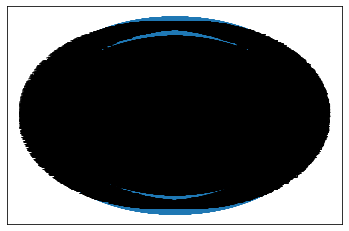

In [ ]:
indexes = np.random.choice(len(G1.edges()), 11268, replace=False)
edges = np.array(G1.edges())[indexes]
G11 = nx.from_edgelist(edges)
nx.draw_networkx(G11, nx.layout.circular_layout(G11))

In [ ]:
G11.number_of_edges()

11268

In [ ]:
df_degree = pd.DataFrame(data=G11.degree())

In [ ]:
df_degree.describe()

,0,1
count,9608.000000,9608.000000
mean,5483.233139,2.345545
std,3166.898173,1.286355
min,0.000000,1.000000
25%,2752.750000,1.000000
50%,5478.500000,2.000000
75%,8226.250000,3.000000
max,10965.000000,10.000000


### **Estágio 12: reduzindo as arestas em 55%**

In [ ]:
22536*0.45

10141.2

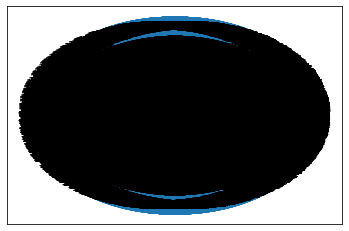

In [ ]:
indexes = np.random.choice(len(G1.edges()), 10141, replace=False)
edges = np.array(G1.edges())[indexes]
G12 = nx.from_edgelist(edges)
nx.draw_networkx(G12, nx.layout.circular_layout(G12))

In [ ]:
G12.number_of_edges()

10141

In [ ]:
df_degree = pd.DataFrame(data=G12.degree())

In [ ]:
df_degree.describe()

,0,1
count,9250.000000,9250.000000
mean,5460.333189,2.192649
std,3155.790479,1.197752
min,1.000000,1.000000
25%,2747.250000,1.000000
50%,5448.500000,2.000000
75%,8171.750000,3.000000
max,10965.000000,9.000000


### **Estágio 13: reduzindo as arestas em 60%**

In [ ]:
22536*0.40

9014.4

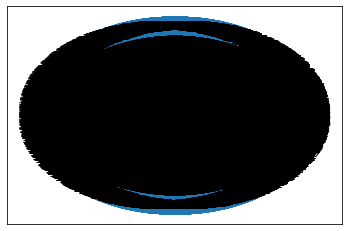

In [ ]:
indexes = np.random.choice(len(G1.edges()), 9014, replace=False)
edges = np.array(G1.edges())[indexes]
G13 = nx.from_edgelist(edges)
nx.draw_networkx(G13, nx.layout.circular_layout(G13))

In [ ]:
G13.number_of_edges()

9014

In [ ]:
df_degree = pd.DataFrame(data=G13.degree())

In [ ]:
df_degree.describe()

,0,1
count,8842.000000,8842.000000
mean,5500.107555,2.038905
std,3155.508684,1.111610
min,0.000000,1.000000
25%,2769.500000,1.000000
50%,5503.500000,2.000000
75%,8238.500000,3.000000
max,10965.000000,8.000000


### **Estágio 14: reduzindo as arestas em 65%**

In [ ]:
22536*0.35

7887.599999999999

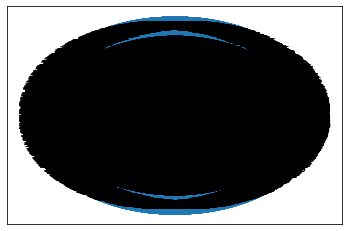

In [ ]:
indexes = np.random.choice(len(G1.edges()), 7887, replace=False)
edges = np.array(G1.edges())[indexes]
G14 = nx.from_edgelist(edges)
nx.draw_networkx(G14, nx.layout.circular_layout(G14))

In [ ]:
G14.number_of_edges()

7887

In [ ]:
df_degree = pd.DataFrame(data=G14.degree())

In [ ]:
df_degree.describe()

,0,1
count,8395.000000,8395.000000
mean,5451.472424,1.878976
std,3153.331791,1.008721
min,1.000000,1.000000
25%,2734.500000,1.000000
50%,5414.000000,2.000000
75%,8187.500000,2.000000
max,10965.000000,8.000000


### **Estágio 15: reduzindo as arestas em 70%**

In [ ]:
22536*0.30

6760.8

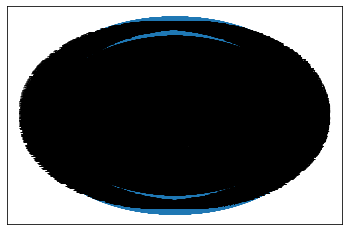

In [ ]:
indexes = np.random.choice(len(G1.edges()), 6760, replace=False)
edges = np.array(G1.edges())[indexes]
G15 = nx.from_edgelist(edges)
nx.draw_networkx(G15, nx.layout.circular_layout(G15))

In [ ]:
G15.number_of_edges()

6760

In [ ]:
df_degree = pd.DataFrame(data=G15.degree())

In [ ]:
df_degree.describe()

,0,1
count,7816.000000,7816.000000
mean,5466.476075,1.729785
std,3146.893961,0.930145
min,0.000000,1.000000
25%,2759.750000,1.000000
50%,5455.000000,1.000000
75%,8203.500000,2.000000
max,10965.000000,7.000000


### **Figura 1: Redução das Arestas (%) X Grau Médio**
Comparando com a figura 1 do artigo proposto ( *5 Graph Reduction Evaluation* - página 335), verifica-se uma semelhança com a linha do gráfico em relação ao DRE.

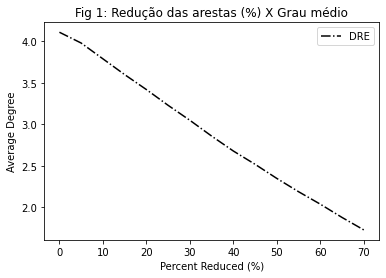

In [ ]:
plt.plot([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70],[4.11,3.98,3.79,3.60,3.42,3.23,3.05,2.86,2.68,2.52,2.35,2.19,2.04,1.88,1.73], 'k-.')
plt.ylabel('Average Degree')
plt.xlabel('Percent Reduced (%)')
plt.title("Fig 1: Redução das arestas (%) X Grau médio")
plt.legend(['DRE'], loc=1)
plt.show()

# Descrição da técnica de sampling utilizada: *Random Edge Sampler*
Essa técnica funciona removendo  as bordas aleatoriamente, cada uma com a mesma probabilidade. A distribuição de graus dos nós eliminados depende da topologia do Grafo estudado.
Removem-se os nós do maior componente, e assim, resultados experimentais mostram que os nós eliminados por DRE têm grau muito baixo (Krishnamurthy V. et al. 2005).